In [ ]:
import numpy as np
import astropy
import matplotlib.pyplot as plt
import os
import astropy.io.fits as fits
from astropy.table import Table
from desitarget import desi_mask, bgs_mask, mws_mask, contam_mask
from desiutil.plots import init_sky, plot_sky_binned
from desiutil.log import get_logger
import warnings
import mpl_toolkits
%matplotlib inline

In [ ]:
program = 'dark'
topdir = os.path.join("/hpcfs/home/ciencias/fisica/docentes/je.forero/desidata/test_20170508/")
truthfile = os.path.join(topdir, 'input/{}/'.format(program), 'truth.fits')
targetfile = os.path.join(topdir, 'input/{}/'.format(program), 'targets.fits')
zcatfile = os.path.join(topdir, 'output/{}/4'.format(program), 'zcat.fits')

#skyfile = os.path.join(topdir, 'sky.fits')
#stddarkfile = os.path.join(topdir, 'standards-dark.fits')
#stdbrightfile = os.path.join(topdir, 'standards-bright.fits')

In [ ]:
targets  = fits.getdata(targetfile)

In [ ]:
Table(targets[:10])

In [ ]:
def qadensity(cat, objtype, targdens=None, max_bin_area=1.0):
    label = '{} (targets/deg$^2$)'.format(objtype)
    if targdens:
        fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    else:
        fig, ax = plt.subplots(1)
    ax = np.atleast_1d(ax)
       
    #with warnings.catch_warnings():
    #    warnings.simplefilter('ignore')
        #basemap = init_sky(galactic_plane_color='k', ax=ax[0]);
    basemap = plot_sky_binned(cat['RA'], cat['DEC'],max_bin_area=1,clip_lo=200)

    #    data, area, _ = plot_sky_binned(cat['RA'], cat['DEC'], max_bin_area=max_bin_area,
    #                                    clip_lo='!1', cmap='jet', plot_type='grid',
    #                                    label=label, basemap=None)
    #if targdens:
    #    dens = data.compressed()
    #ax[1].hist(dens, bins=100, histtype='stepfilled', alpha=0.6, label='Observed {} Density'.format(objtype))
    #    if objtype in targdens.keys():
    #        ax[1].axvline(x=targdens[objtype], ls='--', color='k', label='Goal {} Density'.format(objtype))
    #    ax[1].set_xlabel(label)
    #    ax[1].set_ylabel('Number of Healpixels')
    #    ax[1].legend(loc='upper left', frameon=False)
    #    fig.subplots_adjust(wspace=0.2)

In [8]:
# Desired target densities, including contaminants.
targdens = {'ELG': 2400, 'LRG': 350, 'QSO': 260, 'SKY': 1400}

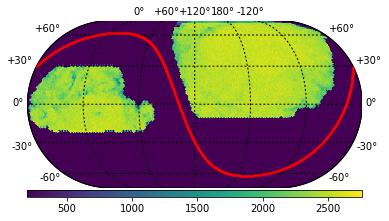

In [9]:
these = np.where((targets['DESI_TARGET'] & desi_mask.mask('ELG')) != 0)[0]
qadensity(targets[these], obj)

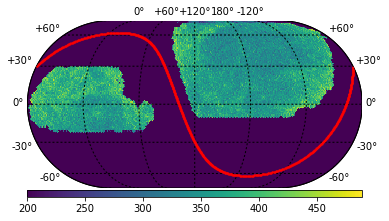

In [10]:
these = np.where((targets['DESI_TARGET'] & desi_mask.mask('LRG')) != 0)[0]
qadensity(targets[these], obj)

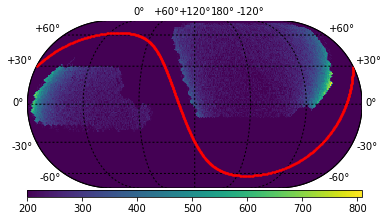

In [11]:
these = np.where((targets['DESI_TARGET'] & desi_mask.mask('QSO')) != 0)[0]
qadensity(targets[these], obj)